In [4]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


#IMPORTING LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [6]:
df= pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-03-31,33.641430,33.801430,33.494286,33.571430,22.726398,107664900
1,2010-04-01,33.915714,34.104286,33.250000,33.709999,22.820208,150786300
2,2010-04-05,33.568573,34.072857,33.538570,34.070000,23.063911,171126900
3,2010-04-06,34.028572,34.320000,33.857143,34.220001,23.165457,111754300
4,2010-04-07,34.221428,34.560001,34.094284,34.371429,23.267965,157125500


#HANDLING CATEGORICAL DATA

In [7]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
labelencoder_X = LabelEncoder()
x[:,0] = labelencoder_X.fit_transform(x[:,0])
x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[0 2 33.801429999999996 33.494285999999995 33.57143 22.726398]
 [1 3 34.104286 33.25 33.709998999999996 22.820207999999997]
 [2 1 34.072857 33.53857 34.07 23.063910999999997]
 ...
 [1180 1150 116.08000200000001 114.639999 115.0 108.419731]
 [1181 1144 114.650002 111.620003 112.400002 105.968506]
 [1182 1139 114.300003 109.349998 114.120003 107.59011100000001]]


In [8]:
x = df[['Open','High','Low','Close']]
#separate the other attributes from the predicting attribute

In [9]:
y = df[['Volume']]
#separte the predicting attribute into Y for model training 

#GRAPHS

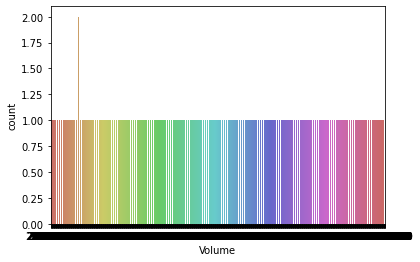

In [10]:
seaborn.countplot(x='Volume',data=df, palette='hls')
plt.show()

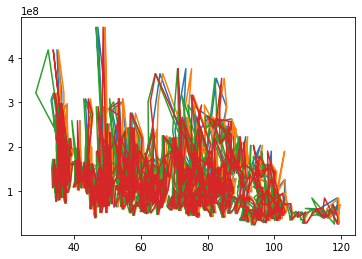

In [11]:
plt.plot(x,y)
plt.show()

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

#NORMALIZING DATA

In [13]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.64093883 0.64016692 0.66887254 0.64718581]
 [0.04217119 0.04203511 0.08831126 0.03507891]
 [0.23533809 0.23141745 0.26730985 0.22090006]
 ...
 [0.34527548 0.34038628 0.37722851 0.34058006]
 [0.56162905 0.58387071 0.59180354 0.58706963]
 [0.45860118 0.47102916 0.48154998 0.47502129]]
[[0.26332491 0.27202311 0.302376   0.27033857]
 [0.21484215 0.21672426 0.24996013 0.20255725]
 [0.4348664  0.45347718 0.46762872 0.45369948]
 [0.24505459 0.24522969 0.28754583 0.24438082]
 [0.65138607 0.65607342 0.67174296 0.64897655]
 [0.44094544 0.43610797 0.45308559 0.41994278]
 [0.80862691 0.80569779 0.81459097 0.79732553]
 [0.28996632 0.28596835 0.31701482 0.28039697]
 [0.22347904 0.2388804  0.26667198 0.24223863]
 [0.69103267 0.69174256 0.70921701 0.68552827]
 [0.01265637 0.00819425 0.06185617 0.00828437]
 [0.87152661 0.89005056 0.88792855 0.88835335]
 [0.54776024 0.55029586 0.56729386 0.54439257]
 [0.61079283 0.6278339  0.63849462 0.62750413]
 [0.27269259 0.27012829 0.31390525 0.27371926]
 [0.601

#ALGORITHM

In [14]:
dt = DecisionTreeRegressor(random_state=42)

#FITTING OF TRAINING DATA

In [15]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [16]:
pred = dt.predict(x_test)

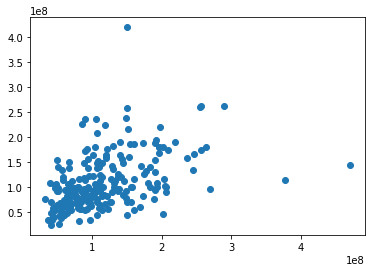

In [17]:
plt.scatter(y_test,pred)

#EVALUATION

In [18]:
print(metrics.accuracy_score(y_test, pred))

0.0


#SAVING THE MODEL USING PICKLE LIBRARY

In [23]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(dt) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(x_test) 


array([1.474515e+08, 1.076334e+08, 1.890931e+08, 1.014846e+08,
       1.603245e+08, 1.905267e+08, 9.462390e+07, 1.581244e+08,
       1.169581e+08, 7.595140e+07, 1.571255e+08, 2.744230e+07,
       9.705360e+07, 8.303960e+07, 1.396710e+08, 1.141602e+08,
       1.644125e+08, 1.134196e+08, 1.634465e+08, 6.201440e+07,
       9.612540e+07, 9.731260e+07, 1.381121e+08, 1.169581e+08,
       8.073870e+07, 1.133167e+08, 1.267189e+08, 9.582230e+07,
       7.785680e+07, 1.490671e+08, 1.333472e+08, 8.973580e+07,
       6.919780e+07, 5.518240e+07, 8.235150e+07, 1.093351e+08,
       9.811690e+07, 7.735560e+07, 1.373176e+08, 9.792090e+07,
       1.233456e+08, 9.526020e+07, 5.413450e+07, 6.820660e+07,
       2.086798e+08, 6.115690e+07, 9.705360e+07, 2.361380e+08,
       8.458030e+07, 7.733880e+07, 4.837700e+07, 1.088451e+08,
       8.371440e+07, 9.337580e+07, 1.050322e+08, 9.793630e+07,
       3.369150e+07, 1.204224e+08, 1.412831e+08, 8.444800e+07,
       1.060703e+08, 1.793050e+08, 1.120525e+08, 6.3944

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [27]:
y_train = y_train[0:17]
pred = pred[0:17]
results =confusion_matrix(y_train, pred)
print(results)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Precision, Recall, Support, Fscore

In [28]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_train, pred, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [30]:
y_test = y_test[0:17]
results =confusion_matrix(y_test, pred)
print(results)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Precision, Recall, Support, Fscore

In [31]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, pred, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0, None)